In [ ]:
from sub.min import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from seaborn import pairplot

In [ ]:
df_out1 = pd.read_csv("1_layer.csv", index_col=0)
df_out2 = pd.read_csv("2_layer.csv", index_col=0)
df_out3 = pd.read_csv("3_layer.csv", index_col=0)
np.random.seed(2)  # random seed grant us an comparable results obtained in each algorithm
df_out3.info()  # the panda framework display an easier to read matrix
data = df_out2[['Orientation','Ventilation','Shading','Insulation Thickness','Window to Wall Ratio','total (Q)']].values  # convert the values in the file into a matrix specifically an Ndarray

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Orientation               100 non-null    int64  
 1   Ventilation               100 non-null    float64
 2   Shading                   100 non-null    float64
 3   Insulation Thickness      100 non-null    float64
 4   Window to Wall Ratio      100 non-null    float64
 5   Electricity:Facility      100 non-null    float64
 6   DistrictCooling:Facility  100 non-null    float64
 7   DistrictHeating:Facility  100 non-null    float64
 8   total (Q)                 100 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 7.8 KB


In [ ]:
Np, Nf = np.shape(data)
Np, Nf

(100, 6)

In [ ]:

data_train = data[0:int(Np/2), :]  # the training data is 50% of the whole data set
data_val = data[int(Np/2):int(Np*0.75), :]  # validation data set 25%
data_test = data[int(Np*0.75):Np, :]  # test data set 25%

mean = np.mean(data_train, 0)  # returns a row of means
std = np.std(data_train, 0)  # returns a row of standard deviations
print("std deviation: ", std)

# standardizing our data means that an eventual offset will be not considered
data_train_norm = (data_train - mean)/std
data_val_norm = (data_val - mean)/std
data_test_norm = (data_test - mean)/std

std deviation:  [9.89836350e+01 6.00000000e-02 8.83189950e+00 1.45229786e-01
 2.19632740e-01 1.50013454e+01]


In [ ]:
mean_check = np.mean(data_train_norm, 0)  # returns a row of means
std_check = np.std(data_train_norm, 0)  # returns a row of standard deviations
mean_check, std_check

(array([-7.99360578e-17,  0.00000000e+00, -3.33066907e-17, -8.88178420e-17,
        -5.99520433e-17, -1.48492330e-15]), array([1., 1., 1., 1., 1., 1.]))

In [ ]:
F0 = 5 # F0 is the feature we want to choose in order to be the regressand in our case  it is the Total Q
# regressands y and regressors X set up
y_train = data_train_norm[:, F0]
X_train = np.delete(data_train_norm, F0, 1)
y_val = data_val_norm[:, F0]
X_val = np.delete(data_val_norm, F0, 1)
y_test = data_test_norm[:, F0]
X_test = np.delete(data_test_norm, F0, 1)

In [ ]:
# with the slicing operation we have to keep in mind to check the resulting shape
# print(np.shape(y_train)) to check
y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
# some inizialization before starting the algorithms
logx = 0
logy = 1
Nit = 30
# gamma = 1e-5
mse_train = np.zeros((6, 1), dtype=float)
mse_val = np.zeros((6, 1), dtype=float)
mse_test = np.zeros((6, 1), dtype=float)

Steepest Descent algorithm  :
the optimum weight vector is: 
[[ 0.06075165]
 [ 0.14680401]
 [-0.13778623]
 [-0.72204179]
 [ 0.04748089]]


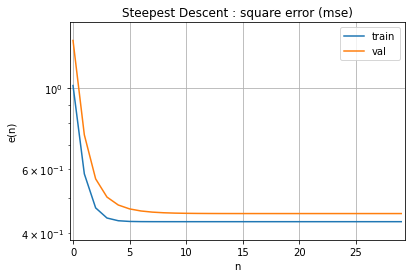

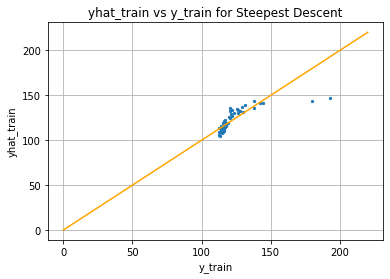

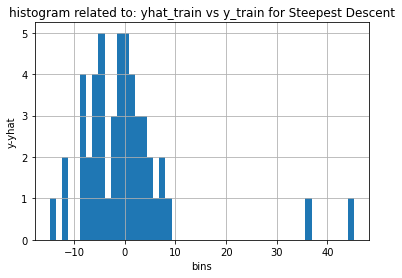

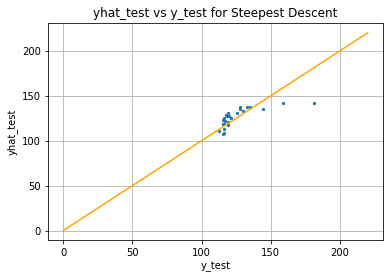

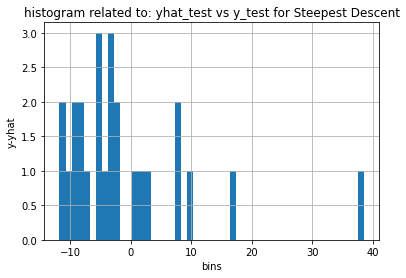

In [ ]:
sd = SolveSteepDesc(y_train, X_train, y_val, X_val, y_test, X_test)
mse_train[2], mse_val[2], mse_test[2] = sd.run(Nit)
sd.print_result('Steepest Descent algorithm')
sd.plot_err('Steepest Descent : square error', logy, logx)
sd.print_hat('yhat_train vs y_train for Steepest Descent', 'yhat_train','y_train',y_train, X_train,mean[F0],std[F0])
sd.print_hat('yhat_test vs y_test for Steepest Descent', 'yhat_test', 'y_test', y_test, X_test, mean[F0],std[F0])

In [ ]:
'''w=np.array([[-0.01942819],
 [ 0.02405054],
 [ 0.02271791],
 [-0.77846603],
 [ 0.14416589],])'''
'''w=np.array([[-0.07657716],
 [ 0.03720988],
 [-0.02415487],
 [-0.73439275],
 [ 0.44391246]])'''
w=np.array([[ 0.06075165],
 [ 0.14680401],
 [-0.13778623],
 [-0.72204179],
 [ 0.04748089]])
w.shape

(5, 1)

In [ ]:

samples_temp = []
orientation_values = [0,90,180,270] 
wwr_values = np.linspace(0.1,0.9,100)
ventilation_values = [0, 0.12] 
tickness_values = [0.01, 0.112, 0.479]
shading = np.linspace(0,30,31)
for ori in orientation_values:
    for wwr_ in wwr_values:
        for vent in ventilation_values:
            for tickness in tickness_values:
                for shade in shading:
                    samples_temp.append({'Orientation': ori,
                                         'Ventilation': vent,
                                         'Shading': shade,
                                         'Insulation Thickness': tickness,
                                         'Window to Wall Ratio': wwr_,})
samples = pd.DataFrame.from_dict(samples_temp)
samples

,Orientation,Ventilation,Shading,Insulation Thickness,Window to Wall Ratio
0,0,0.00,0.0,0.010,0.1
1,0,0.00,1.0,0.010,0.1
2,0,0.00,2.0,0.010,0.1
3,0,0.00,3.0,0.010,0.1
4,0,0.00,4.0,0.010,0.1
...,...,...,...,...,...
74395,270,0.12,26.0,0.479,0.9
74396,270,0.12,27.0,0.479,0.9
74397,270,0.12,28.0,0.479,0.9
74398,270,0.12,29.0,0.479,0.9


In [ ]:
test_data=samples.values
test_data_norm=(test_data -mean[:5])/std[:5]
# checking if the mean and standard deviation are respected
mean_check = np.mean(test_data_norm, 0)  # returns a row of means
std_check = np.std(test_data_norm, 0)  # returns a row of standard deviations
mean_check, std_check

(array([-0.01818482,  0.        , -0.10085545, -0.56461312, -0.04370444]),
 array([1.01656258, 1.        , 1.01272347, 1.38676095, 1.062051  ]))

In [ ]:
total_Q = np.dot(test_data_norm,w)
total_Q_denorm = (total_Q * std[-1])+mean[-1]

In [ ]:
total_Q_denorm.min()

100.28874892928366

In [ ]:
total_Q.argmin()

55862

In [ ]:
with np.printoptions(precision=3, suppress=True):
    print(test_data[total_Q.argmin(),:])

[ 0.     0.    30.     0.479  0.1  ]


In [ ]:
samples["total (Q)"] = total_Q_denorm

,Orientation,Ventilation,Shading,Insulation Thickness,Window to Wall Ratio,total (Q)
count,74400.000000,74400.00,74400.000000,74400.000000,74400.000000,74400.000000
mean,135.000000,0.06,15.000000,0.200333,0.500000,130.125372
std,100.623735,0.06,8.944332,0.201400,0.233263,15.371762
min,0.000000,0.00,0.000000,0.010000,0.100000,101.088749
25%,67.500000,0.00,7.000000,0.010000,0.300000,111.699895
50%,135.000000,0.06,15.000000,0.112000,0.500000,136.696684
75%,202.500000,0.12,23.000000,0.479000,0.700000,142.400960
max,270.000000,0.12,30.000000,0.479000,0.900000,152.573876


In [ ]:
samples.to_csv("2_layer_reg.csv")